# Computer Vision LAB 1 Report 

## Task 1

In [25]:
import cv2
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

**Task code**

In [26]:
def loadImage(filename):
    
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # Check for success
    if img is None:
        print('Failed to open', filename)
        return
    return img

def padArray(arr, vPadSize, hPadSize):
    (rows, columns) = arr.shape
    # Pad array by creating array with all zeroes
    padded = np.zeros(shape=(rows + vPadSize * 2, columns + hPadSize * 2))
    # Then copy values from original into the slice where it should be in the padded arr
    np.copyto(padded[vPadSize:rows + vPadSize, hPadSize:columns + hPadSize], arr)
    return padded

def multiplyAndSum(arr1, arr2):
    # Multiplies two slices, element by element and outputs sum of all cells after the multiplication
    (rows, columns) = arr1.shape
    res = 0
    for rowI in range(rows):
        for columnI in range(columns):
            val1 = arr1[rowI][columnI]
            val2 = arr2[rowI][columnI]
            res += val1 * val2
    return res

def convolve(arr, kernel):
    rows, columns = arr.shape
    vKernelSize, hKernelSize = kernel.shape
    resultImg = np.empty(shape=(rows, columns), dtype=np.float32)
    vPadSize = int((vKernelSize - 1) / 2)
    hPadSize = int((hKernelSize - 1) / 2)
    # Use intermediate padded array, to not mutate original array
    # Pad array
    intermediate = padArray(arr, vPadSize, hPadSize)
    # Iterate through pixels
    # Modify start iterator to go through non pad values
    for rowI in range(vPadSize, rows + vPadSize):
        for columnI in range(hPadSize, columns + hPadSize):
            # Get kernel sized slice
            imgSlice = intermediate[rowI - vPadSize:rowI + vPadSize + 1, columnI - hPadSize:columnI + hPadSize + 1]
            resultImg[rowI - vPadSize][columnI - hPadSize] = multiplyAndSum(imgSlice, kernel)
    return resultImg

Image results for convolving with either average or weighted average blur kernel

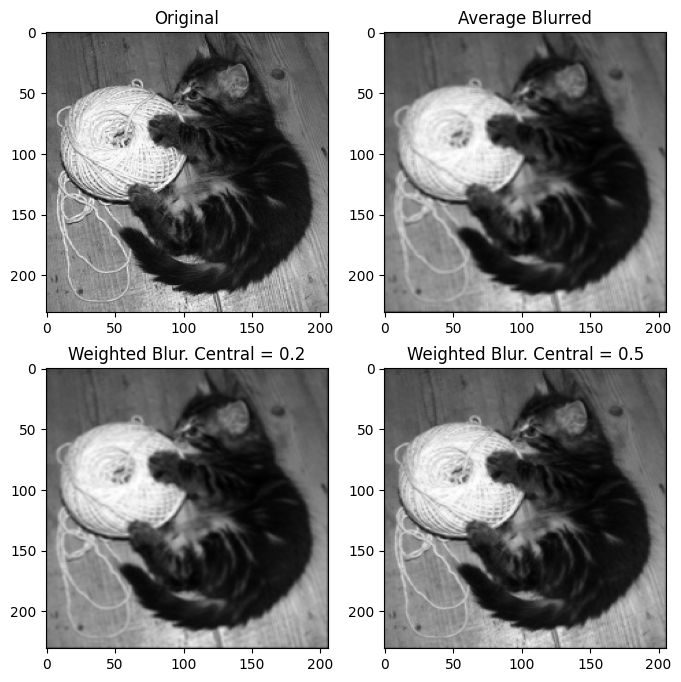

In [27]:
def blurKitty():
    fig = plt.figure(figsize=(8, 8))
    img = loadImage("kitty.bmp")
    plt.subplot(2, 2, 1)
    plt.title("Original")
    plt.imshow(img, 'grey', aspect='auto')
    averageBlurKernel = np.asanyarray([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9 ]
    ], dtype=np.float32)
    averageBlurred = convolve(img, averageBlurKernel)
    plt.subplot(2, 2, 2)
    plt.title("Average Blurred")
    plt.imshow(averageBlurred, 'grey', aspect='auto')
    weightedBlurKernel = np.asanyarray([
        [0.1, 0.1, 0.1],
        [0.1, 0.2, 0.1],
        [0.1, 0.1, 0.1 ]
    ], dtype=np.float32)
    weightedBlurred = convolve(img, weightedBlurKernel)
    plt.subplot(2, 2, 3)
    plt.title("Weighted Blur. Central = 0.2")
    plt.imshow(weightedBlurred, 'grey', aspect='auto')
    weightedBlurKernel2 = np.asanyarray([
        [1/16, 1/16, 1/16],
        [1/16, 0.5, 1/16],
        [1/16, 1/16, 1/16 ]
    ], dtype=np.float32)
    weightedBlurred2 = convolve(img, weightedBlurKernel2)
    plt.subplot(2, 2, 4)
    plt.title("Weighted Blur. Central = 0.5")
    plt.imshow(weightedBlurred2, 'grey', aspect='auto')
    plt.show()
blurKitty()

## Task 2

**Task Code**

In [28]:
def getEdges(img, weight):
    horizontalDiffKernel = np.asanyarray([
        [-1     , 0, 1],
        [-weight, 0, weight],
        [-1     , 0, 1 ]
    ], dtype=np.float32)
    verticalDiffKernel = np.asanyarray([
        [-1, -weight, -1],
        [0, 0       , 0],
        [1  , weight, 1 ]
    ], dtype=np.float32)
    horizontalEdges = convolve(img, horizontalDiffKernel)
    # For this exercise we don't care about edge directions so take the absolute
    # Clamp to max greyscale value of 255 to prevent overflow
    horizontalEdges = np.minimum(np.abs(horizontalEdges), np.full(horizontalEdges.shape, 255)).astype(np.uint8)
    verticalEdges = convolve(img, verticalDiffKernel)
    verticalEdges = np.minimum(np.abs(verticalEdges), np.full(verticalEdges.shape, 255)).astype(np.uint8)
    return horizontalEdges, verticalEdges

def getGradientMagnitudes(horizontalEdges, verticalEdges):
    resultImg = np.empty(shape=horizontalEdges.shape, dtype=np.uint8)
    (rows, columns) = horizontalEdges.shape
    for rowI in range(rows):
        for columnI in range(columns):
            horizontalMagnitude = horizontalEdges[rowI][columnI]
            verticalMagnitude = verticalEdges[rowI][columnI]
            # Clamp to max greyscale value of 255 to prevent overflow
            resultImg[rowI][columnI] = min(255, sqrt(horizontalMagnitude ** 2 + verticalMagnitude ** 2))
    return resultImg


Image results for horizontal and vertical edge strengths either average or weighted average

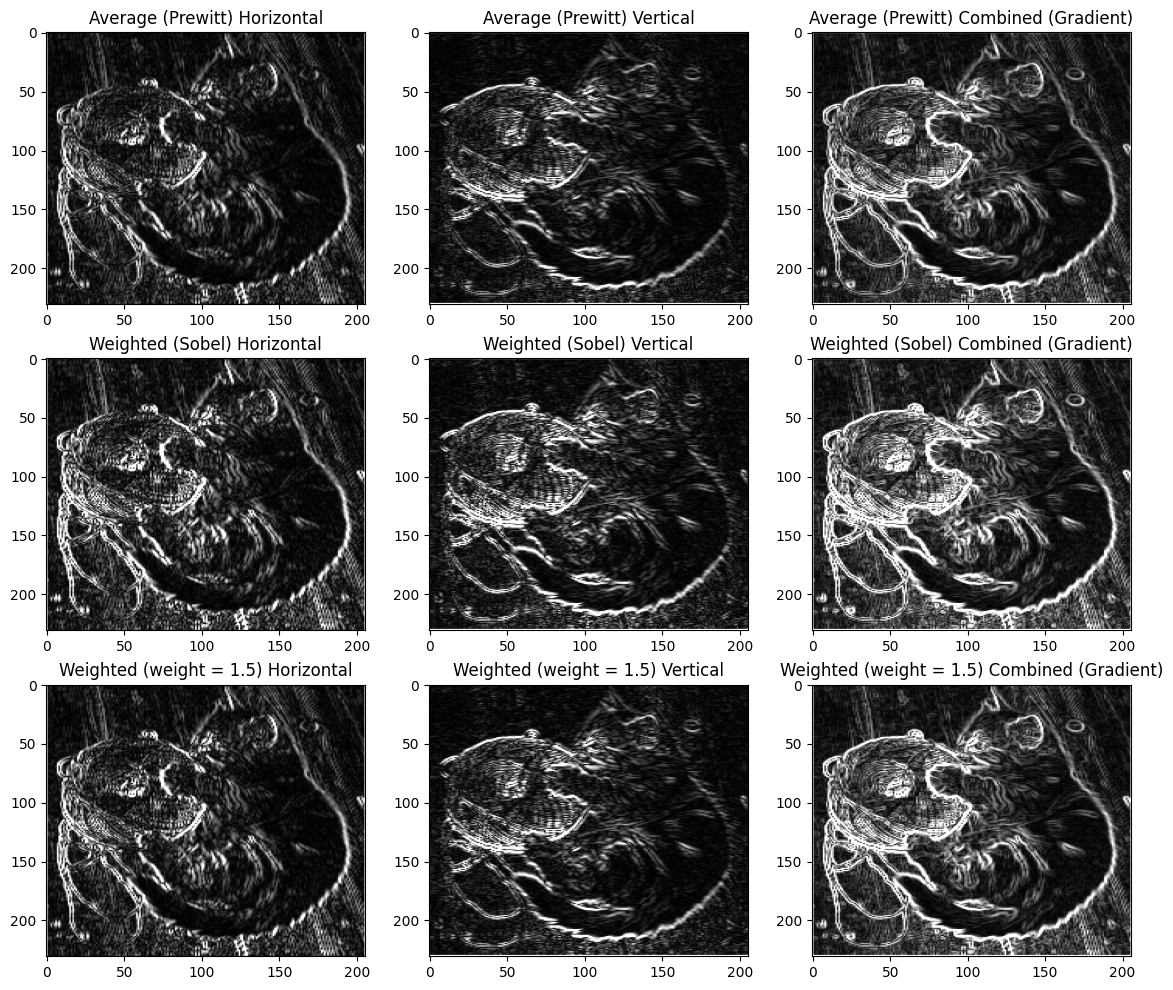

In [29]:
def getKittyEdges():
    fig = plt.figure(figsize=(14, 12))
    img = loadImage("kitty.bmp")
    h1, v1 = getEdges(img, 1)
    g1 = getGradientMagnitudes(h1, v1)
    plt.subplot(3, 3, 1)
    plt.title("Average (Prewitt) Horizontal")
    plt.imshow(h1, 'grey', aspect='auto' )
    plt.subplot(3, 3, 2)
    plt.title("Average (Prewitt) Vertical")
    plt.imshow(v1, 'grey', aspect='auto' )
    plt.subplot(3, 3, 3)
    plt.title("Average (Prewitt) Combined (Gradient)")
    plt.imshow(g1, 'grey', aspect='auto')

    h2, v2 = getEdges(img, 2)
    g2 = getGradientMagnitudes(h2, v2)
    plt.subplot(3, 3, 4)
    plt.title("Weighted (Sobel) Horizontal")
    plt.imshow(h2, 'grey', aspect='auto' )
    plt.subplot(3, 3, 5)
    plt.title("Weighted (Sobel) Vertical")
    plt.imshow(v2, 'grey', aspect='auto' )
    plt.subplot(3, 3, 6)
    plt.title("Weighted (Sobel) Combined (Gradient)")
    plt.imshow(g2, 'grey', aspect='auto')

    h3, v3 = getEdges(img, 1.5)
    g3 = getGradientMagnitudes(h3, v3)
    plt.subplot(3, 3, 7)
    plt.title("Weighted (weight = 1.5) Horizontal")
    plt.imshow(h3, 'grey', aspect='auto' )
    plt.subplot(3, 3, 8)
    plt.title("Weighted (weight = 1.5) Vertical")
    plt.imshow(v3, 'grey', aspect='auto' )
    plt.subplot(3, 3, 9)
    plt.title("Weighted (weight = 1.5) Combined (Gradient)")
    plt.imshow(g3, 'grey', aspect='auto')
    plt.show()
    return g1, g2, g3

g1, g2, g3 = getKittyEdges()

## Task 3

**Task Code**

In [30]:
def threshold(img, threshold):
    MAX_VAL = 255
    MIN_VAL = 0
    (rows, columns) = img.shape
    resultImg = np.empty(img.shape, dtype=np.uint8)
    for rowI in range(rows):
        for columnI in range(columns):
            val = img[rowI][columnI]
            resultImg[rowI][columnI] = MAX_VAL if val >= threshold else MIN_VAL
    return resultImg

**Histograms**\
I used those to derive best threshold value

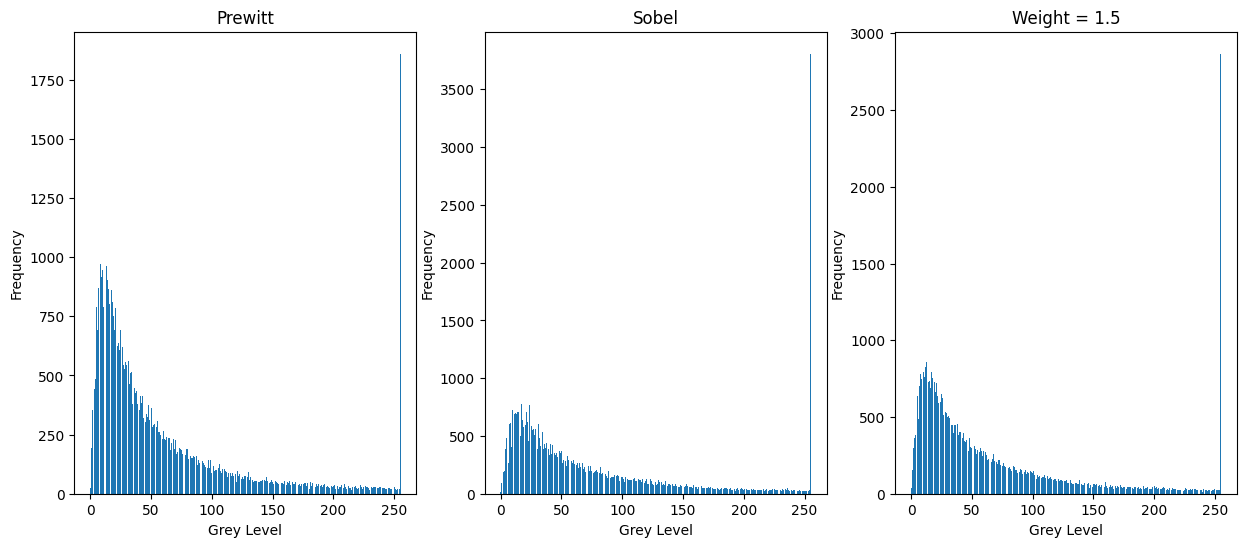

In [31]:
def showHistogram(img, title):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist.reshape(256)
    plt.bar(np.linspace(0,255,256), hist)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Grey Level')

fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
showHistogram(g1, "Prewitt")
plt.subplot(1, 3, 2)
showHistogram(g2, "Sobel")
plt.subplot(1, 3, 3)
showHistogram(g3, "Weight = 1.5")
plt.show()

Maximum values (255) are mainly due to pixels on the edges, since we pad with 0s, which produces a large edge strength at the borded as the background is mainly whitish, so it produces large negative numbers when compared with padding of 0 (completely black)

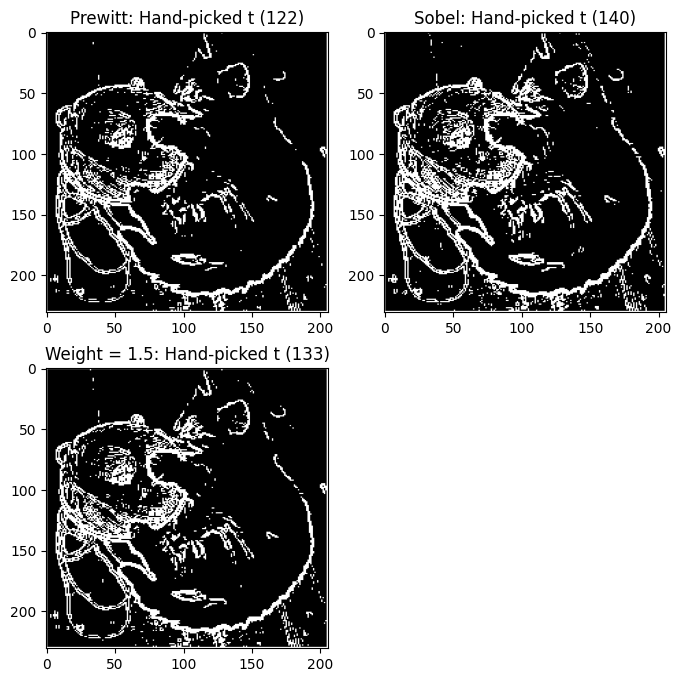

In [32]:

def getThresholdImages():
    plt.subplot(2, 2, 1)
    th1 = threshold(g1, 122)
    plt.title("Prewitt: Hand-picked t (122)")
    plt.imshow(th1, "grey", aspect='auto')
    plt.subplot(2, 2, 2)
    th2 = threshold(g2, 140)
    plt.title("Sobel: Hand-picked t (140)")
    plt.imshow(th2, "grey", aspect='auto')
    plt.subplot(2, 2, 3)
    th3 = threshold(g3, 133)
    plt.title("Weight = 1.5: Hand-picked t (133)")
    plt.imshow(th3, "grey", aspect='auto')

fig = plt.figure(figsize=(8, 8))
getThresholdImages()
plt.show()

Threshold was selected as such: increase threshold as much as possible while still maintaining as much of kitty's outline. The histogram doesn't quite have a nicely visible inter-modal minimum, so for the initial guess of t I used OTSU's algorithm and then increased the value until it stopped picking up the necessary edges.

# Extra

One of the issues is too small of a scale. There are too many small color changes that we don't care about such as wood grains and individual strands of the ball. To increase the scale and ignore smaller structures we can use gaussian blur of varying kernel size and sigmas. I repeated experiments with 3x3, 5x5 and 7x7 gaussian blurs + differential to detect edges

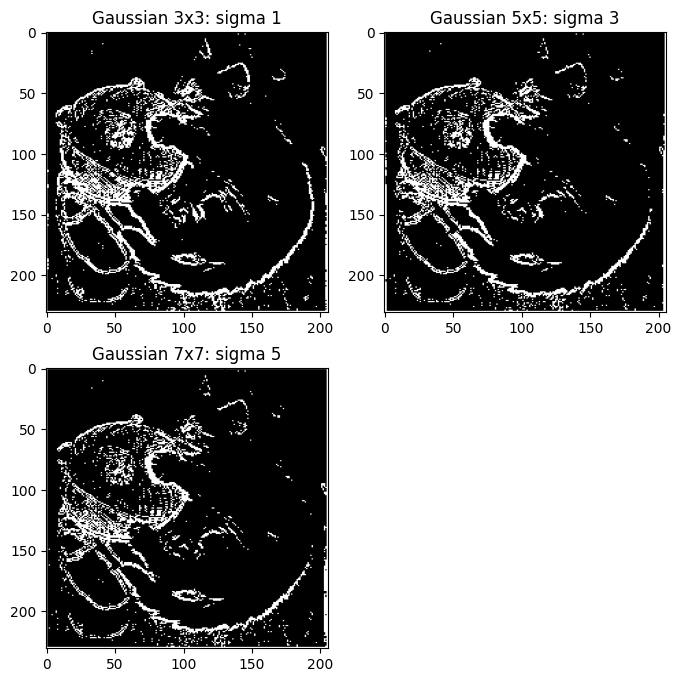

In [33]:
def getEdgesGaussian(img, gaussianKernel):
    temp = convolve(img, gaussianKernel)
    horizontalDiff = np.asarray([
        [-1, 0, 1]
    ])
    verticalDiff = np.asarray([
        [-1],
        [0],
        [1]
    ])
    horizontalEdges = convolve(temp, horizontalDiff)
    horizontalEdges = np.minimum(np.abs(horizontalEdges), np.full(horizontalEdges.shape, 255)).astype(np.uint8)
    verticalEdges = convolve(img, verticalDiff)
    verticalEdges = np.minimum(np.abs(verticalEdges), np.full(verticalEdges.shape, 255)).astype(np.uint8)
    return horizontalEdges, verticalEdges

fig = plt.figure(figsize=(8, 8))
gauss3 = cv2.getGaussianKernel(3 * 3, 1).reshape((3, 3))
img = loadImage("kitty.bmp")
hG1, vG1 = getEdgesGaussian(img, gauss3)
gG1 = getGradientMagnitudes(hG1, vG1)
plt.subplot(2, 2, 1)
plt.title("Gaussian 3x3: sigma 1")
plt.imshow(threshold(gG1, 44), "grey", aspect='auto')
gauss5 = cv2.getGaussianKernel(5 * 5, 3).reshape((5, 5))
hG2, vG2 = getEdgesGaussian(img, gauss5)
gG2 = getGradientMagnitudes(hG2, vG2)
plt.subplot(2, 2, 2)
plt.title("Gaussian 5x5: sigma 3")
plt.imshow(threshold(gG2, 44), "grey", aspect='auto')
gauss7 = cv2.getGaussianKernel(7 * 7, 5).reshape((7, 7))
hG3, vG3 = getEdgesGaussian(img, gauss7)
gG3 = getGradientMagnitudes(hG3, vG3)
plt.subplot(2, 2, 3)
plt.title("Gaussian 7x7: sigma 5")
plt.imshow(threshold(gG3, 44), "grey", aspect='auto')
plt.show()

We do certainly pick up less small scale structures, but we lose a sizable chunk of kitty's outline, due to overblurring. 3x3 Offers the best outline while picking up less details.

We can try to compensate for non-uniform lightning by first applying very blurry gaussian smoothing to try to estimate shading and then subtract it from original image, which should remove difference in illumination in different parts of the image

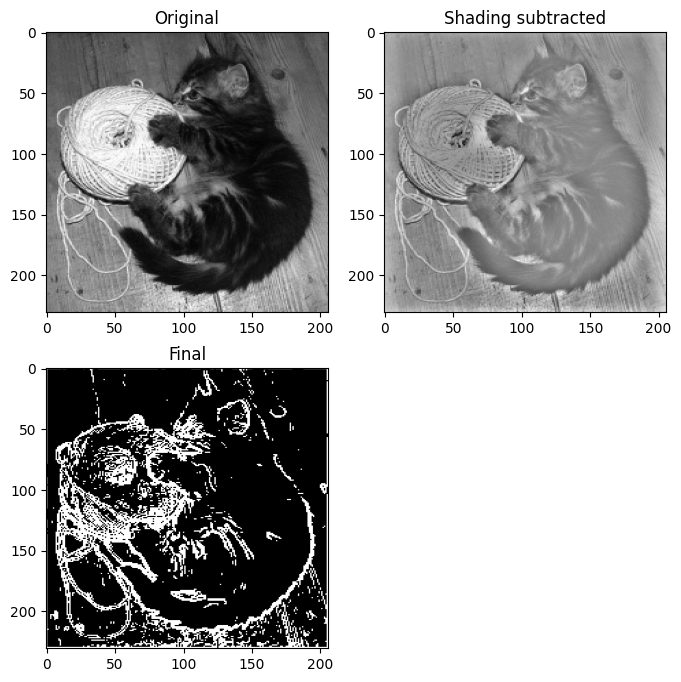

In [34]:
def diffLight(img):
    size = 31
    shading = convolve(img, cv2.getGaussianKernel(size * size, 160).reshape((size, size)))
    return img - shading

fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title("Original")
img = loadImage("kitty.bmp")
plt.imshow(img, "grey", aspect='auto')

imgDiffed = diffLight(img)
plt.subplot(2, 2, 2)
plt.title("Shading subtracted")
plt.imshow(imgDiffed, "grey", aspect='auto')
h, v = getEdges(imgDiffed, 2)
g = getGradientMagnitudes(h, v)
plt.subplot(2, 2, 3)
plt.title("Final")
plt.imshow(threshold(g, 125), "grey", aspect='auto')

It certainly has not deteriorated the result compared to normal Sobel. However there is not much improvement either, the head is still not detected properly. Adaptive thresholding would probably function better to negate lightning difference. Or manually correcting the image. 

# Conclusion 
All kernels struggled to fully detect the head of the kitten. This is mainly because of non-uniform lightning at that part, as there is a shadow there that decreases brightness of the background (floor) there and makes thresholding difficult, selecting lower threshold picks up the head border but we will also get lots of other uneccesary edges such as wood grains.

Sobel seems to be the best out of examined kernels. It manages to detect some of the kitty's head, which makes sense as it sharpens the pixels along the edge, which increases the strength of all edges. This allows for more edges to be detected, which has upsides and downsides, for example many small scale structures like fur patterns and ball's thread gaps were also detected, which might pollute the data with unneccessary information. 

Prewitt picks up the least amount of small scale structures. This is due to it not weighing pixels along the edge higher, so in effect it smooths more than other edge detectors examined, and thus increasing the scale at which edges get detected.

Higher the weight of the pixels along the edge = increased median grey level in the edge gradient picture, which then in turn increases the Threshold t that we need to use to in order to be able to detect major edges. So threshold t increases proportionally to the weighting used. Using higher weight is more useful in images with more subtle edges i.e color change between background and foreground is lower in value. This may happen if for example the kitty had white fur, it would blend more into the background floor and the thread ball.

In [35]:
print(f"Median: Weight 1 (Prewitt) = {np.median(g1)}")
print(f"Median: Weight 1.5 = {np.median(g3)}")
print(f"Median: Weight 2 (Sobel) = {np.median(g2)}")


Median: Weight 1 (Prewitt) = 36.0
Median: Weight 1.5 = 42.0
Median: Weight 2 (Sobel) = 49.0
